# Lab 2 - Computational Intelligence 2024

In [ ]:
## Kernel
# #
# C:\Users\Lorenzo Ugoccioni\Documents\PoliTo\LM - III anno\Computational Intelligence\Labs\.venv\Scripts\python.exe

In [34]:
import logging
from tqdm import tqdm 
from itertools import combinations
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt
import random
from collections import Counter 

from icecream import ic

#logging.basicConfig(level=logging.DEBUG)

In [223]:
cities = pd.read_csv('cities/china.csv', header=None, names=['City', 'x', 'y'])
cities

,City,x,y
0,Acheng,45.540000,126.960000
1,Aksu,41.150000,80.250000
2,Alaer,40.515556,81.263611
3,Altay,47.840000,88.130000
4,Anbu,23.460000,116.680000
...,...,...,...
721,Ziyang,30.140000,104.640000
722,Zoucheng,35.400000,116.966667
723,Zouxian,35.410000,116.940000
724,Zunhua,40.183333,117.966667


In [224]:
def compute_geografic_distance_matrix(cities):
    dist_matrix = np.zeros((len(cities), len(cities)))
    for c1, c2 in combinations(cities.itertuples(), 2):
        dist_matrix[c1.Index, c2.Index] = dist_matrix[c2.Index, c1.Index] = geopy.distance.geodesic(
            (c1.x, c1.y), (c2.x, c2.y)
        ).km

    np.fill_diagonal(dist_matrix, np.inf)
    return dist_matrix

def compute_euclidean_distance_matrix(cities):
    dist_matrix = np.zeros((cities.shape[0], cities.shape[0]))
    x_coords = cities['x'].values
    y_coords = cities['y'].values

    # Use broadcasting to calculate the Euclidean distance for all pairs of cities
    dist_matrix = np.sqrt((x_coords[:, np.newaxis] - x_coords[np.newaxis, :])**2 + 
                          (y_coords[:, np.newaxis] - y_coords[np.newaxis, :])**2)
    # Set diagonal to infinity to avoid self-loops (distance from a city to itself is set to inf)
    np.fill_diagonal(dist_matrix, np.inf)
    return dist_matrix

### Plot

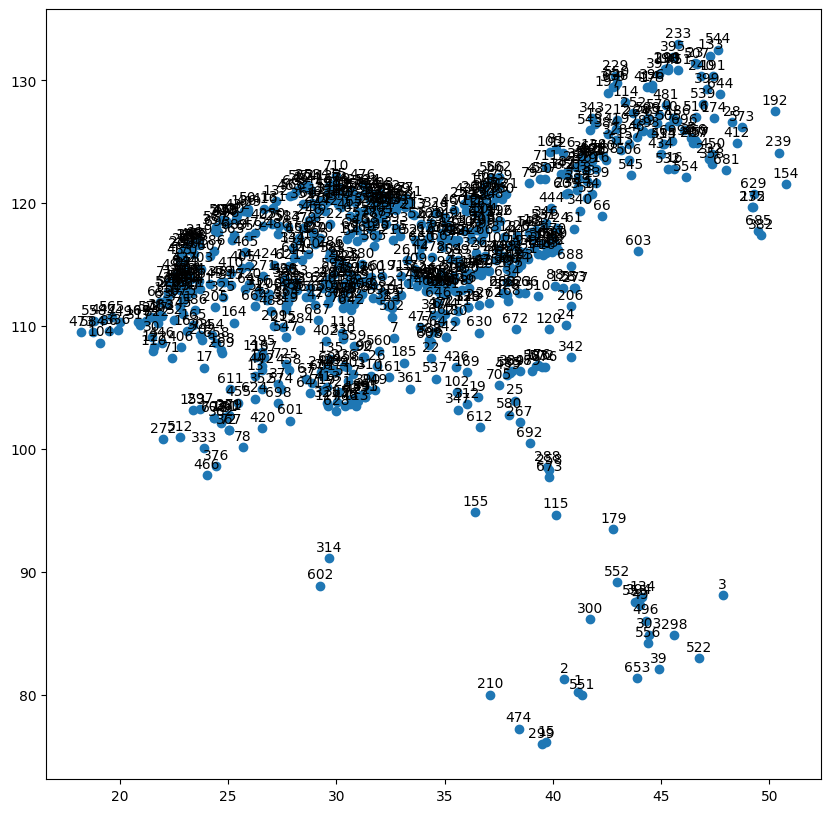

In [225]:
def plot_cities_graph(cities, path):    
    coord_X = cities['x'].values
    coord_Y = cities['y'].values
    plt.figure(figsize=(10,10))
    #plt.xlim(min(coord_X), min(coord_X)+6)
    #plt.ylim(min(coord_Y), min(coord_Y)+6)

    plt.scatter(coord_X, coord_Y)

    for i in range(len(coord_X)):
        plt.annotate(i, (coord_X[i], coord_Y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    if path is not None:
        plt.scatter(coord_X[path[0]], coord_Y[path[0]], color='green', )

        for i in range(len(path)):
            plt.plot([coord_X[path[i%len(path)]], coord_X[path[(i+1)%len(path)]]], [coord_Y[path[i%len(path)]], coord_Y[path[(i+1)%len(path)]]], color='black')
        
        #for i in range(len(coord_X)):
        #    plt.annotate(i, (coord_X[i], coord_Y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plot_cities_graph(cities, None)

In [226]:
#compute_geografic_distance_matrix(cities)

### Greedy Solution - Mooving from frontier city

In [111]:
visited_city = np.full(len(cities), False)
min_dist = np.inf
cities_distance = compute_geografic_distance_matrix(cities)

percorso = []

next_city = np.argmin(cities_distance, axis=0)

for i in next_city:
    if i == next_city[next_city[i]]:
        if cities_distance[i, next_city[i]] < min_dist:
            min_dist = cities_distance[i, next_city[i]]
            percorso.clear()
            percorso.extend([int(i), int(next_city[i])])

visited_city[percorso] = True
#cities_distance[percorso] = np.inf

while not np.all(visited_city):
    # print(f'{" ".join(map(str, percorso))}')
    print(cities_distance)
    next_city = np.argmin(cities_distance[:, [percorso[0], percorso[-1]]], axis=0)
    starting_city = np.argmin(cities_distance[next_city, [percorso[0], percorso[-1]]])
    if starting_city:
        percorso.append(int(next_city[starting_city]))
    else:
        percorso.insert(0, int(next_city[starting_city]))

    visited_city[percorso] = True
    cities_distance[percorso] = np.inf

print(f'Percorso:\n{" ".join(map(str, percorso))}')

[[          inf 3764.69510517 3714.87739253 ... 1407.31502677
   944.64967259 2655.51135093]
 [3764.69510517           inf  110.78415293 ... 3247.9448388
  3165.91237553 2852.07115528]
 [3714.87739253  110.78415293           inf ... 3163.73278122
  3095.54373578 2745.75940324]
 ...
 [1407.31502677 3247.9448388  3163.73278122 ...           inf
   537.4541193  1277.64363732]
 [ 944.64967259 3165.91237553 3095.54373578 ...  537.4541193
            inf 1717.41641664]
 [2655.51135093 2852.07115528 2745.75940324 ... 1277.64363732
  1717.41641664           inf]]
[[          inf 3764.69510517 3714.87739253 ... 1407.31502677
   944.64967259 2655.51135093]
 [3764.69510517           inf  110.78415293 ... 3247.9448388
  3165.91237553 2852.07115528]
 [3714.87739253  110.78415293           inf ... 3163.73278122
  3095.54373578 2745.75940324]
 ...
 [1407.31502677 3247.9448388  3163.73278122 ...           inf
   537.4541193  1277.64363732]
 [ 944.64967259 3165.91237553 3095.54373578 ...  537.4541193
 

### PLOT Greedy Solution

In [227]:
cities_distance = compute_geografic_distance_matrix(cities)

#print(f"Cities tour: {' -> '.join([cities.iat[percorso[t%len(percorso)], 0] for t in range(len(percorso)+1)])}")
print(f"Distance covered: {np.sum([cities_distance[percorso[t%len(percorso)], percorso[(t+1)%len(percorso)]] for t in range(len(percorso)) ])}")

KeyboardInterrupt: 

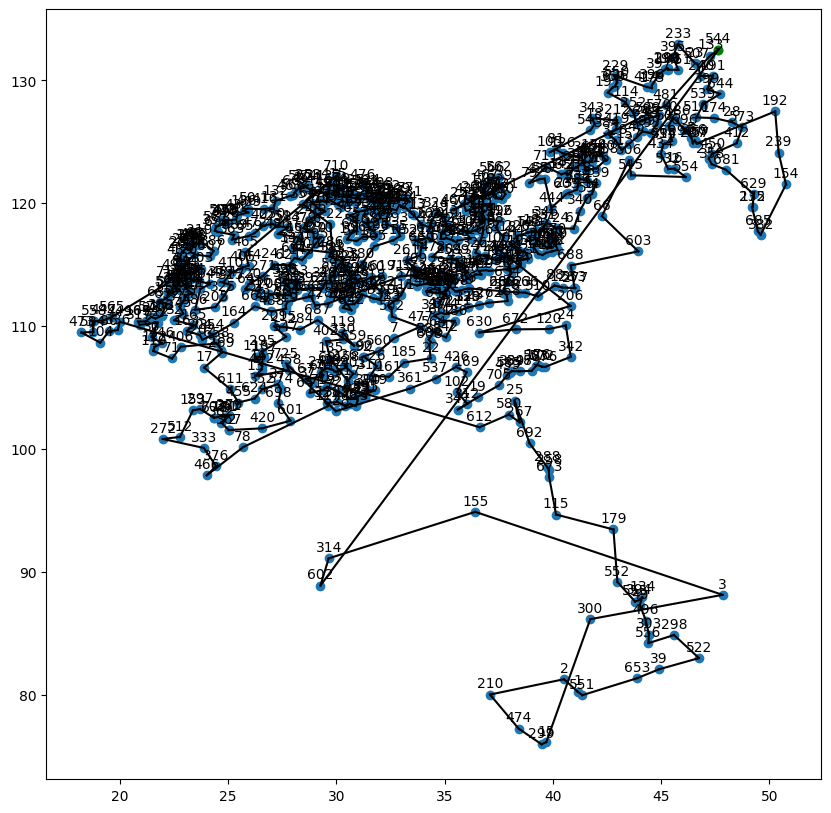

In [114]:
plot_cities_graph(cities, percorso)

## Genetic Alghorithm

In [228]:
class SalesMan:
    def __init__(self, path: list[int], length: float = None):
        self.path = path
        self.length = length

    def set_length(self):
        self.length = np.sum([cities_distance[self.path[t%len(self.path)], self.path[(t+1)%len(self.path)]] for t in range(len(self.path))])
        return self

    def get_path(self) -> list[int]:
        return self.path
    
    def get_length(self) -> float :
        return self.length
    
    def copy(self):
        return SalesMan(path=self.path[:])

In [229]:
def starting_population(pop_size, num_cities):
    start_pop = [ SalesMan(path=np.random.permutation(num_cities)) for _ in range(pop_size) ]
    start_pop = [ ind.set_length() for ind in start_pop ]
    return start_pop

cities_distance = compute_geografic_distance_matrix(cities)

In [230]:
TOURNAMENT_SIZE = 0
NUM_GENERATIONS = 500000
POPULATION_SIZE = 100
NUM_OFFSPRING = 30

### Mutation Techniques

In [231]:
def mutation(ind):  # 2 loci(gene) swapped
    offspring = ind.copy()
    idx1, idx2 = random.randint(0, len(ind.path) - 1), random.randint(0, len(ind.path) - 1)
    offspring.path[idx1], offspring.path[idx2] = offspring.path[idx2], offspring.path[idx1]
    offspring.set_length()
    return offspring


def mutation_n(ind, mutation_prob=0.5):  # loci(gene) swapped if under a threshold
    offspring = ind.copy()
    while random.random() < mutation_prob:
        idx1, idx2 = random.randint(0, len(ind.path) - 1), random.randint(0, len(ind.path) - 1)
        offspring.path[idx1], offspring.path[idx2] = offspring.path[idx2], offspring.path[idx1]
    offspring.set_length()
    return offspring

def macro_mutation(ind: SalesMan) -> SalesMan:
    path_offspring = ind.get_path().copy()

    cut_points = [random.randint(0, len(path_offspring) - 1) for _ in range(2)]
    path_offspring = np.concatenate((path_offspring[min(cut_points):max(cut_points)], path_offspring[:min(cut_points)], path_offspring[max(cut_points):]))
    
    offspring = SalesMan(path=path_offspring)
    return offspring.set_length()

'''def micro_mutation(ind: SalesMan) -> SalesMan:  # loci(gene) swapped if under a threshold
    path_offspring = ind.get_path().copy()
    print(path_offspring)
    cut_point = random.randint(0, len(path_offspring) - 1)
    path_offspring = path_offspring[cut_point:cut_point] + path_offspring[:cut_point] + path_offspring[cut_point:]
    
    offspring = SalesMan(path=path_offspring)
    return offspring.set_length()'''

def scramble_mutation(ind: SalesMan) -> SalesMan:
    path_offspring = ind.get_path().copy()
    pot_size = random.randint(0, len(path_offspring) - 1)

    #path_offspring = [ for _ in range(pot_size)]
    
    offspring = SalesMan(path=path_offspring)
    return offspring.set_length()

def insert_mutation(ind: SalesMan) -> SalesMan:
    path_offspring = ind.get_path().copy()
    cut_points = [random.randint(0, len(path_offspring) - 1) for _ in range(2)]

    path_offspring = np.concatenate((path_offspring[:min(cut_points)], [path_offspring[min(cut_points)], path_offspring[max(cut_points)]], path_offspring[min(cut_points)+1:max(cut_points)], path_offspring[max(cut_points)+1:]))
    
    offspring = SalesMan(path=path_offspring)
    return offspring.set_length()

def inversion_mutation(ind: SalesMan) -> SalesMan:
    path_offspring = ind.get_path().copy()
    cut_points = [random.randint(0, len(path_offspring) - 1) for _ in range(2)]

    path_offspring = np.concatenate((path_offspring[:min(cut_points)], path_offspring[min(cut_points):max(cut_points)][::-1], path_offspring[max(cut_points):]))
    
    offspring = SalesMan(path=path_offspring)
    return offspring.set_length()

### Recombination Techniques

In [232]:
def Partially_Mapped_Crossover(p1: SalesMan, p2: SalesMan) -> (SalesMan, SalesMan) :
    parent_path1, parent_path2 = p1.get_path(), p2.get_path()
    path1, path2 = [-1 for _ in range(len(parent_path1))], [-1 for _ in range(len(parent_path1))]
    cut_points = [None, None]

    while cut_points[0] == cut_points[1]:
        cut_points = [random.randint(0, len(parent_path1) - 1) for _ in range(len(cut_points))]
    
    # Crossover inside the cut point & mapping inside the cut
    for j in range(min(cut_points), max(cut_points)):
        path1[j] = int(parent_path2[j])
        path2[j] = int(parent_path1[j])
    
    # Fill w/cities not in conflict. Use mapping to fill if a city is present in the cut

    for i in range(0, min(cut_points)):
        if parent_path1[i] not in path1:
            path1[i] = int(parent_path1[i])
        else:
            idx = path1.index(parent_path1[i])
            while int(parent_path1[idx]) in path1:
                idx = path1.index(parent_path1[idx])
            path1[i] = int(parent_path1[idx])

        if parent_path2[i] not in path2:
            path2[i] = int(parent_path2[i])
        else:
            idx = path2.index(parent_path2[i])
            while int(parent_path2[idx]) in path2:
                idx = path2.index(parent_path2[idx])
            path2[i] = int(parent_path2[idx])
            
    for i in range(max(cut_points), len(path1)):
        if parent_path1[i] not in path1:
            path1[i] = int(parent_path1[i])
        else:
            idx = path1.index(parent_path1[i])
            while int(parent_path1[idx]) in path1:
                idx = path1.index(parent_path1[idx])
            path1[i] = int(parent_path1[idx])

        if parent_path2[i] not in path2:
            path2[i] = int(parent_path2[i])
        else:
            idx = path2.index(parent_path2[i])
            while int(parent_path2[idx]) in path2:
                idx = path2.index(parent_path2[idx])
            path2[i] = int(parent_path2[idx])
            
    offspring1, offspring2 = SalesMan(path1), SalesMan(path2)
    return offspring1.set_length(), offspring2.set_length()

def Inver_Over(p1: SalesMan, p2: SalesMan) -> SalesMan :    # Preserve 1 Edge from a parent, and every other edges from the otherone
    parent_path1, parent_path2 = p1.get_path(), p2.get_path()
    gene = random.choice(parent_path1)
    #print(parent_path1, parent_path2)
    next_gene = parent_path2[(np.where(parent_path2 == gene)[0][0]+1)%len(parent_path1)]
    min_index = min(np.where(parent_path1 == gene)[0][0], np.where(parent_path1 == next_gene)[0][0])
    max_index = max(np.where(parent_path1 == gene)[0][0], np.where(parent_path1 == next_gene)[0][0])

    offspring_path = np.concatenate((parent_path1[: min_index], [gene, next_gene], parent_path1[min_index+1 : max_index][::-1], parent_path1[max_index+1 :]))

    offspring = SalesMan(path=offspring_path)
    return offspring.set_length()

### Parent Selection

In [233]:
def roulette_wheel(population):  # Roulette wheel with same probability
    return random.choice(population)

def roulette_wheel_fitness_weight(population):  # Roulette wheel with fitness as weight
    w = [1/ind.get_length() for ind in population]
    probabilities = [wi / sum(w) for wi in w]
    return random.choices(population, weights=probabilities, k=1)[0]

def static_tournament(population):
    pool = [random.choice(population) for _ in range(TOURNAMENT_SIZE)]
    champ = max(pool, key=lambda ind: ind.get_length())
    return champ

def best_parent_ever(population):
    champ = max(population, key=lambda ind: ind.get_length())
    return champ

def genotype_distance(population):  # Select the 2 element with most close genotype
    '''distance = np.array(
        [[sum(np.bitwise_xor(np.array(population[i][0]), np.array(population[j][0]))) for j in range(len(population))]
         for i in range(len(population))])
    max_position = np.unravel_index(np.argmax(distance, axis=None), distance.shape)

    return population[max_position[0]][0], population[max_position[1]][0]'''
    pass

### Survival Selection

In [234]:
def distance_ind(population):  # Use the distance in the genotype as a selecting criteria
    distance = np.array([[sum(np.bitwise_xor(np.array(population[i][0]), np.array(population[j][0]))) for j in range(len(population))]
         for i in range(len(population))])
    avg_distance_ind = sorted([(np.sum(ind)/(len(ind) - 1), i) for i, ind in enumerate(distance)], reverse=True)

    copy_population = [population[avg_distance_ind[ind][1]] for ind in range(len(population))]    # ORDERING FROM BEST TO WORSE
    return copy_population[:POPULATION_SIZE]  # SURVIVAL SELECTION

def survival_selection(population):
    population.sort(key=lambda ind: ind[1], reverse=True)  # ORDERING FROM BEST TO WORSE
    return population[:POPULATION_SIZE]  # SURVIVAL SELECTION

def remove_twin(population):  # Remove TWIN from the population because I belive that they will have the same fitness
    twins = {j for i in range(len(population)) for j in range(i + 1, len(population)) if population[i] == population[j]}
    new_p = [ind for i, ind in enumerate(population) if i not in twins]
    return new_p

def survive_only_the_best(population):
    population.sort(key=lambda ind: ind[1], reverse=True)  # ORDERING FROM BEST TO WORSE
    return population[:1]  # SURVIVAL SELECTION

### Heuristic

In [ ]:
def heuristic(ind: SalesMan):
    path = ind.get_path().tolist()
    pair = [-1, -1]
    
    for i in range(len(path)+1%len(path)):
        city = path[i]
        next_city = path[i+1%len(path)]
        if cities_distance[city, next_city] > cities_distance[pair[0], pair[1]]:
            pair = [city, next_city]
    
    closest_city = [np.argmin(cities_distance[pair[0]]), np.argmin(cities_distance[pair[1]])]
    
    
    pass

###

In [235]:
def GA(population_size=100, num_generations=100, num_offspring=20):
    current_population = starting_population(population_size, cities_distance.shape[0])
    history = list()

    for n in tqdm(range(num_generations)):
        offsprings = []
        for _ in range(num_offspring):      #   NEW OFFSPRING TO THE POPULATION
            #if random.random() < 0.3:
            #    heuristic(current_population)
            #else:
            p1, p2 = roulette_wheel_fitness_weight(current_population), roulette_wheel(current_population)
            offspring1 = Inver_Over(p1, p2)
            mut = random.choice([mutation_n, macro_mutation, inversion_mutation, insert_mutation])     # mutation, micor_mutation
            offsprings.extend([mut(offspring1)])

        current_population.extend(offsprings)
        current_population.sort(key=lambda i:i.length)         # ORDERING FROM BEST TO WORSE
        #print(len(current_population))
        current_population = current_population[:population_size]       # SURVIVAL SELECTION

        #if not n%10:
        #    print(f"Best Salesman of {n}° generation travels {round(current_population[0].get_length(), 2)} km  to cover all cities")
        history.append(current_population[0].get_length())

    print(f"Best Salesman travels {round(current_population[0].get_length(), 2)} km  to cover all cities\n")

    return history, current_population[0]

In [ ]:
GA_history, bestSalesman = GA(population_size=POPULATION_SIZE, num_generations=NUM_GENERATIONS, num_offspring=NUM_OFFSPRING)

  0%|          | 901/500000 [00:56<22:12:26,  6.24it/s]

### Plot history

Distance covered: 83389.51406200872


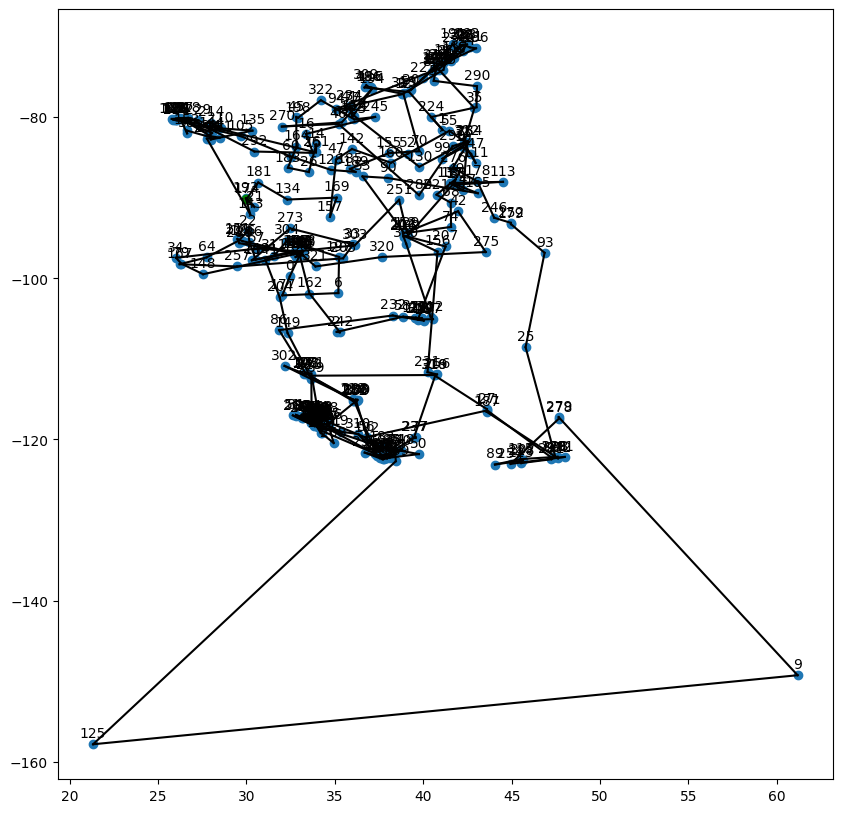

In [ ]:
plot_cities_graph(cities, bestSalesman.get_path())
percorso = bestSalesman.get_path()

#print(f"Cities tour: {' -> '.join([str(percorso[t%len(percorso)]) for t in range(len(percorso)+1)])}")
#print(f"Cities tour: {' ->\n'.join([cities.iat[percorso[t%len(percorso)], 0] for t in range(len(percorso)+1)])}")
print(f"Distance covered: {np.sum([cities_distance[percorso[t%len(percorso)], percorso[(t+1)%len(percorso)]] for t in range(len(percorso)) ])}")

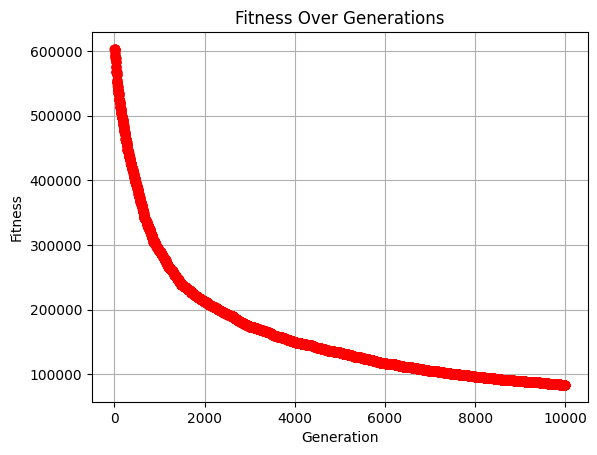

In [ ]:
GA_history = np.array(GA_history)

generations = list(range(1, len(GA_history) + 1))
plt.plot(generations, GA_history, marker='o', linestyle='-', color='r')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()